<a href="https://colab.research.google.com/github/PromiMojumder38/computer-vision-projects/blob/main/traffic-video-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yt-dlp

In [ ]:
!yt-dlp --version

2025.12.08


In [ ]:
!yt-dlp -f mp4 -o trafficc.mp4 "https://www.youtube.com/watch?v=CftLBPI1Ga4"

         Pre-merged mp4 formats are not available from all sites, or may only be available in lower quality.
         To prioritize the best h264 video and aac audio in an mp4 container, use "-t mp4" instead.
         If you know what you are doing and want a pre-merged mp4 format, use "-f b[ext=mp4]" instead to suppress this warning
[youtube] Extracting URL: https://www.youtube.com/watch?v=CftLBPI1Ga4
[youtube] CftLBPI1Ga4: Downloading webpage
[youtube] CftLBPI1Ga4: Downloading android sdkless player API JSON
[youtube] CftLBPI1Ga4: Downloading web safari player API JSON
[youtube] CftLBPI1Ga4: Downloading m3u8 information
[info] CftLBPI1Ga4: Downloading 1 format(s): 96
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 3
[download] Destination: trafficc.mp4
[download] 100% of    2.95MiB in 00:00:00 at 11.40MiB/s
[FixupM3u8] Fixing MPEG-TS in MP4 container of "trafficc.mp4"


In [ ]:
!ls

sample_data  trafficc.mp4


In [ ]:
!pip install ultralytics opencv-python

In [ ]:
from ultralytics import YOLO

# Pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # fast and lightweight

In [ ]:
import cv2

video_path = "trafficc.mp4"
cap = cv2.VideoCapture(video_path)

print("Video opened:", cap.isOpened())

Video opened: True


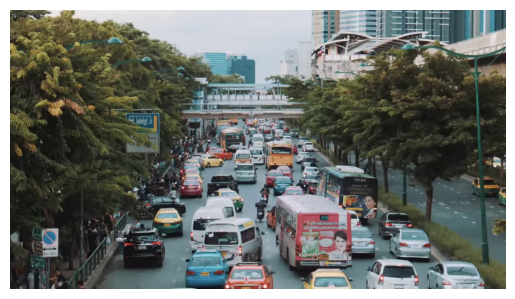

In [ ]:
import matplotlib.pyplot as plt

ret, frame = cap.read()

if ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.axis("off")
else:
    print("Failed to read frame")

cap.release()

In [ ]:
!pip install ultralytics

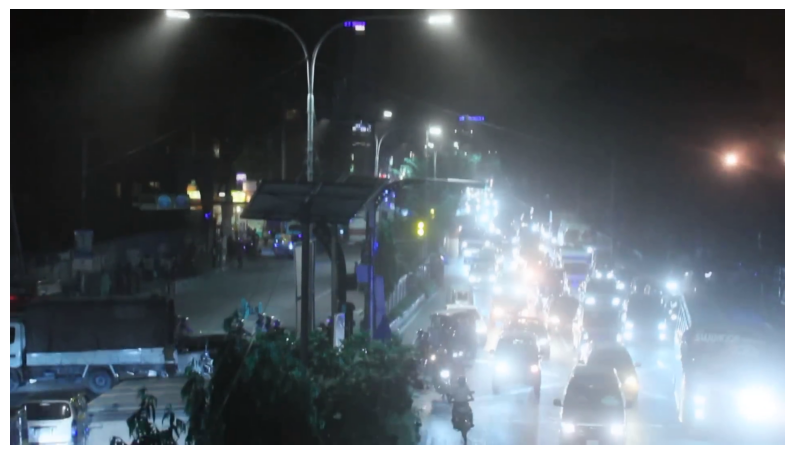

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'annotated' is the frame from YOLO
plt.figure(figsize=(10,6))
plt.imshow(annotated)
plt.axis("off")
plt.show()

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO("yolov8n.pt")

input_video = "trafficc.mp4"
output_video = "traffic_annotated.mp4"

cap = cv2.VideoCapture(input_video)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated = results[0].plot()  # YOLO annotated frame
    out.write(annotated)           # save to video

cap.release()
out.release()
print(f"Annotated video saved as {output_video}")


0: 384x640 1 person, 17 cars, 4 buss, 2 trucks, 190.5ms
Speed: 6.1ms preprocess, 190.5ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17 cars, 4 buss, 2 trucks, 146.9ms
Speed: 4.3ms preprocess, 146.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19 cars, 4 buss, 2 trucks, 160.6ms
Speed: 5.5ms preprocess, 160.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19 cars, 4 buss, 2 trucks, 150.0ms
Speed: 5.4ms preprocess, 150.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20 cars, 4 buss, 2 trucks, 135.3ms
Speed: 4.3ms preprocess, 135.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20 cars, 4 buss, 1 truck, 169.4ms
Speed: 9.3ms preprocess, 169.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19 cars, 4 buss, 140.4ms
Speed: 5.3ms preprocess,

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('traffic_annotated.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video width=640 controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")

Buffered data was truncated after reaching the output size limit.